In [1]:
import pandas as pd

In [14]:
data=pd.read_csv('text.csv')
data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [15]:
data.count()

Unnamed: 0    416809
text          416809
label         416809
dtype: int64

In [16]:
data.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data.rename(columns={'text':'Text','label':'Label'},inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [19]:
mapping={
    0:'Sadness',
    1:'Joy',
    2:'Love',
    3:'Anger',
    4:'Fear',
    5:'Surprise'}
data['Label']=data['Label'].map(mapping)
data.head()

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


In [20]:
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [24]:
def is_clean(text):
    # Remove URL
    data['Text']=data['Text'].str.replace(r'http\S+','',regex=True)
    # Remove Special Characters
    data['Text']=data['Text'].str.replace(r'[^A-Za-z0-9]+',' ',regex=True)
    # Remove White Spaces
    data['Text']=data['Text'].str.replace(r'\s+',' ',regex=True)
    # Remove Numeric Characters
    data['Text']=data['Text'].str.replace(r'\d+','',regex=True)
    # Remove Punctuation
    data['Text']=data['Text'].str.replace(r'[^\w\s]','',regex=True)
    # Remove Emojis
    data['Text']=data['Text'].apply(lambda x: ''.join([c for c in x if c not in emoji.EMOJI_DATA]))
    # Convert to Lowercase
    data['Text']=data['Text'].str.lower()
    # Remove Stopwords
    stop_words=set(stopwords.words('english'))
    data['Text']=data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return True, "Text is Clean"

In [25]:
is_clean(data['Text'])

(True, 'Text is Clean')

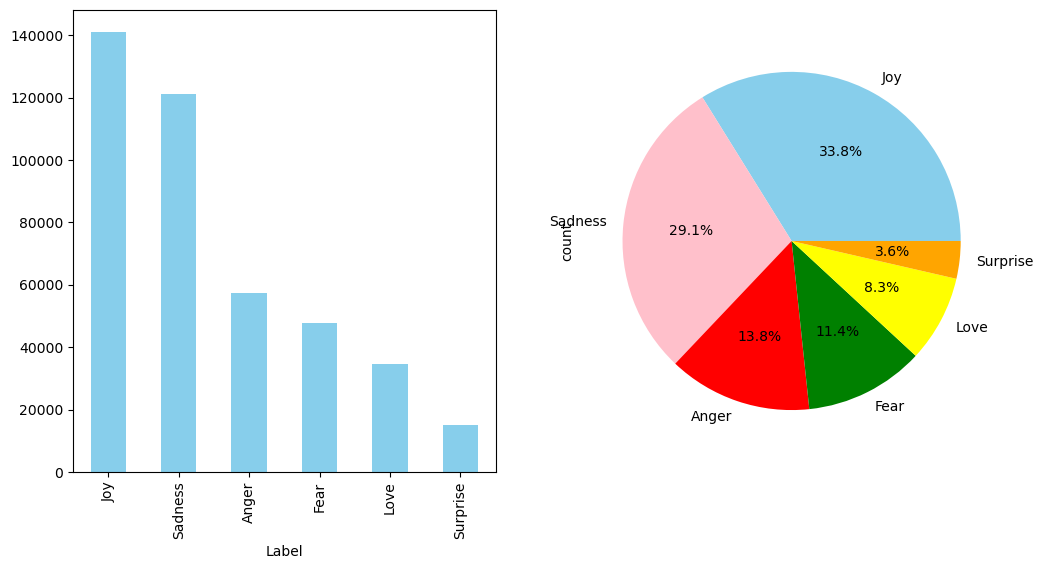

In [26]:
import matplotlib.pyplot as plt

count=data['Label'].value_counts()
fig,ax=plt.subplots(1,2,figsize=(12,6),facecolor='white')
count.plot(kind='bar',ax=ax[0],color='skyblue')
count.plot(kind='pie',autopct='%1.1f%%',ax=ax[1],colors=['skyblue','pink','red','green','yellow','orange'])
plt.show()

In [27]:
mapping={
    'Sadness':0,
    'Joy':1,
    'Love':2,
    'Anger':3,
    'Fear':4,
    'Surprise':5}
data['Label']=data['Label'].map(mapping)
data.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [28]:
data.to_csv('cleaned_text.csv',index=False)